<a href="https://colab.research.google.com/github/ufrpe-ensino/ic-aulas/blob/master/aulas/14_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas

O pacote [pandas](https://pandas.pydata.org) é uma das ferramentas mais importantes para iniciar o estudo e aplicação de aprendizagem de máquina com Python. 

## O que é o Pandas?
O pandas é essencialmente a casa dos seus dados. Através dos pandas, você se familiariza com seus dados lendo, limpando, transformando e analisando.

Por exemplo, digamos que você queira explorar um conjunto de dados armazenado em um CSV no seu computador. O pandas automatiza o processo de leitura e extração de dados desse CSV para um DataFrame - basicamente, uma tabela - e permite que você faça coisas como:

- Calcule estatísticas e responda a perguntas sobre os dados, como
- Qual é a média, mediana, máximo ou mínimo de cada coluna?
- A coluna A está correlacionada com a coluna B?
- Como é a distribuição de dados na coluna C?
- Limpe os dados fazendo coisas como remover valores ausentes e filtrar linhas ou colunas por alguns critérios
- Visualize os dados com a ajuda do Matplotlib. Plotar barras, linhas, histogramas, bolhas e muito mais.
- Armazene os dados limpos e transformados de volta em um arquivo CSV, outro ou banco de dados

Antes de entrar na modelagem ou nas visualizações complexas, você precisa ter uma boa compreensão da natureza do seu conjunto de dados e o pandas é atualmente a melhor ferramenta gratuita para isso.

## Instalando o pandas

In [1]:
!pip install pandas

## Lendo / Baixando um csv
A função `read_csv` permite a leitura de arquivos locais e de arquivos remotos (URLs).

No exemplo abaixo, utilizaremos uma amostragem dos dados produzidos no estudo [Long-term monitoring and experimental manipulation of a Chihuahuan Desert ecosystem near Portal, Arizona, USA.](http://www.esapubs.org/archive/ecol/E090/118/default.htm)


In [2]:
import pandas as pd

url="https://raw.githubusercontent.com/ufrpe-ensino/ic-aulas/master/data/surveys.csv"
df=pd.read_csv(url, sep=',')

O arquivo contém um estudo de espécies capturadas na área estudada, incluindo o peso de cada animal. 
Os dados estão armazenados no formato CSV, estruturado em colunas, as quais contém informação acerca de um animal:

--------------------
| Coluna | Descrição| 
| :---: | :---: |
|record_id 	| Unique id da observação |
|month     	| Mês da observação |
|day   		| Dia da observação |
|year		| Ano da observação |
|plot_id	| ID do local |
|species_id	| 2-letter code |
|sex		| sexo do animal (“M”, “F”) |
|hindfoot_length	| comprimento do 'calcanhar'/*hindfoot* (?) mm |
|weight		|peso do animal em gramas |

## Imprimindo algumas linhas do Dataframe na tela 

In [3]:
print(df[0:3])

   record_id  month  day  year  plot_id species_id sex  hindfoot_length  \
0          1      7   16  1977        2         NL   M             32.0   
1          2      7   16  1977        3         NL   M             33.0   
2          3      7   16  1977        2         DM   F             37.0   

   weight  
0     NaN  
1     NaN  
2     NaN  


Como estamos utilizando o Jupyter, podemos usar o `display`:

In [4]:
display(df[0:3])

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN


ou simplesmente acessar a variável contendo o dataframe:

In [5]:
df[:5]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN


## Acessando uma coluna específica

In [6]:
df['weight']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
35544     NaN
35545     NaN
35546    14.0
35547    51.0
35548     NaN
Name: weight, Length: 35549, dtype: float64

## Adicionando uma nova coluna

In [7]:
df['weight2'] = df['weight'].fillna(0)
df[:3]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight,weight2
0,1,7,16,1977,2,NL,M,32.0,NaN,0.0
1,2,7,16,1977,3,NL,M,33.0,NaN,0.0
2,3,7,16,1977,2,DM,F,37.0,NaN,0.0


## Removendo uma coluna

In [8]:
df.drop('weight2',axis=1, inplace=True)
df[:3]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN


## Acessando uma (ou mais) linhas
## Pelo índice

In [9]:
df.loc[:, ['sex', 'species_id', 'weight']]

,sex,species_id,weight
0,M,NL,NaN
1,M,NL,NaN
2,F,DM,NaN
3,M,DM,NaN
4,M,DM,NaN
...,...,...,...
35544,NaN,AH,NaN
35545,NaN,AH,NaN
35546,F,RM,14.0
35547,M,DO,51.0


### Por uma condição

In [10]:
df.loc[(df['day'] == 18) & 
       (df['month'] == 5) &
       (df['weight'] < 10)]

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
2965,2966,5,18,1980,15,PF,M,14.0,7.0
2966,2967,5,18,1980,15,PF,M,14.0,7.0
2973,2974,5,18,1980,13,PF,M,14.0,6.0
2988,2989,5,18,1980,15,PF,F,14.0,8.0
2989,2990,5,18,1980,3,PF,F,15.0,7.0
21558,21559,5,18,1994,19,PF,M,16.0,8.0
21560,21561,5,18,1994,19,PF,M,16.0,6.0
21565,21566,5,18,1994,19,PF,M,16.0,9.0
21571,21572,5,18,1994,21,PF,F,17.0,7.0
21572,21573,5,18,1994,21,PF,M,17.0,7.0


### Exercício
Selecione a coluna `weight` dos animais machos coletados no mês de maio

In [11]:
# df.loc[ <filtro de linhas> , <filtro de colunas> ]
df.loc[(df['month'] == 5) &
       (df['sex'] == 'M'),['weight', 'sex'] ]

,weight,sex
832,8.0,M
833,47.0,M
834,149.0,M
837,48.0,M
838,139.0,M
...,...,...
34173,11.0,M
34174,35.0,M
34175,52.0,M
34176,13.0,M


## Descrição geral do dataframe

### Tipos das colunas

In [12]:
df.dtypes

record_id            int64
month                int64
day                  int64
year                 int64
plot_id              int64
species_id          object
sex                 object
hindfoot_length    float64
weight             float64
dtype: object

In [13]:
df.describe(include='all')

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
count,35549.000000,35549.000000,35549.000000,35549.000000,35549.000000,34786,33038,31438.000000,32283.000000
unique,NaN,NaN,NaN,NaN,NaN,48,2,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,DM,M,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,10596,17348,NaN,NaN
mean,17775.000000,6.474022,16.105966,1990.475231,11.397001,NaN,NaN,29.287932,42.672428
std,10262.256696,3.396583,8.256691,7.493355,6.799406,NaN,NaN,9.564759,36.631259
min,1.000000,1.000000,1.000000,1977.000000,1.000000,NaN,NaN,2.000000,4.000000
25%,8888.000000,4.000000,9.000000,1984.000000,5.000000,NaN,NaN,21.000000,20.000000
50%,17775.000000,6.000000,16.000000,1990.000000,11.000000,NaN,NaN,32.000000,37.000000
75%,26662.000000,9.000000,23.000000,1997.000000,17.000000,NaN,NaN,36.000000,48.000000


## Head / Tail

In [14]:
# imprime as 5 primeiras linhas
df.head()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN


In [15]:
# imprime as 5 últimas linhas
df.tail()

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
35544,35545,12,31,2002,15,AH,NaN,NaN,NaN
35545,35546,12,31,2002,15,AH,NaN,NaN,NaN
35546,35547,12,31,2002,10,RM,F,15.0,14.0
35547,35548,12,31,2002,7,DO,M,36.0,51.0
35548,35549,12,31,2002,5,NaN,NaN,NaN,NaN


## Visualizando a contagem de elementos

In [16]:
df['species_id'].value_counts()

DM    10596
PP     3123
DO     3027
PB     2891
RM     2609
DS     2504
OT     2249
PF     1597
PE     1299
NL     1252
OL     1006
PM      899
AH      437
AB      303
SS      248
SH      147
SA       75
RF       75
CB       50
BA       46
SO       43
SF       43
DX       40
PC       39
PL       36
PH       32
CQ       16
CM       13
OX       12
UR       10
PI        9
UP        8
PG        8
RO        8
PX        6
SU        5
PU        5
US        4
UL        4
AS        2
RX        2
ZL        2
ST        1
CU        1
SC        1
CS        1
CT        1
CV        1
Name: species_id, dtype: int64

## Plotando gráficos

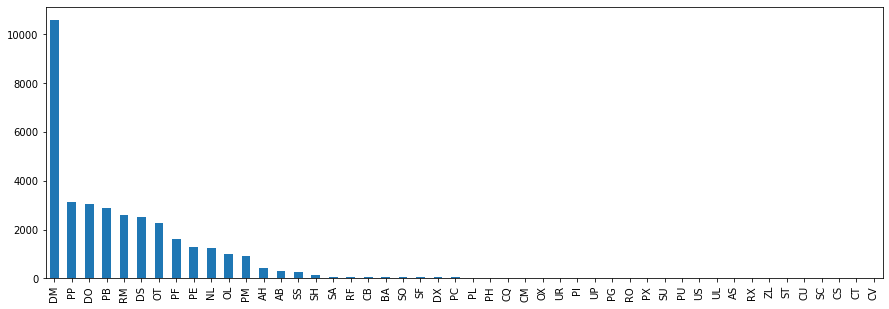

In [17]:
%matplotlib inline

# gráfico de barras
df['species_id'].value_counts().plot(kind='bar', figsize=(15,5))
print()

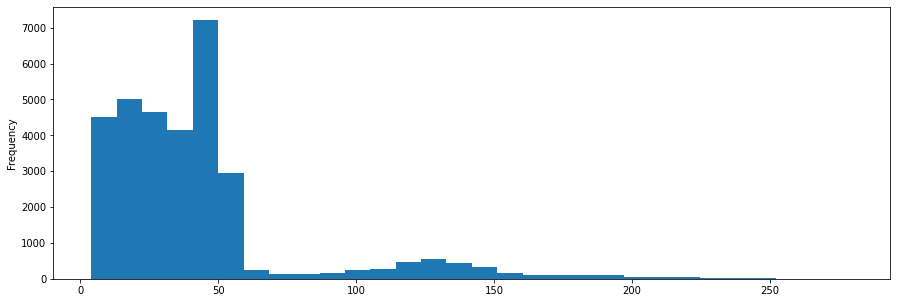

In [18]:
# histograma
df['weight'].plot(kind='hist', figsize=(15,5), bins=30)
print()

## Boxplots
O Box Plot (também chamado de box e whisker plot) é um método alternativo ao histograma e ao ramo-e-folha para representar os dados.

O Box Plot fornece informação sobre as seguintes características do conjunto de dados: localização, dispersão, assimetria, comprimento da cauda e outliers (medidas discrepantes).

Embora o Boxplot forneça informação sobre localização e dispersão, seu verdadeiro valor está na informação que fornece sobre a cauda da distribuição.

Pontos desgarrados (Outliers) podem afetar de forma adversa as decisões a serem tomadas a partir da análise dos dados se não forem devidamente considerados.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


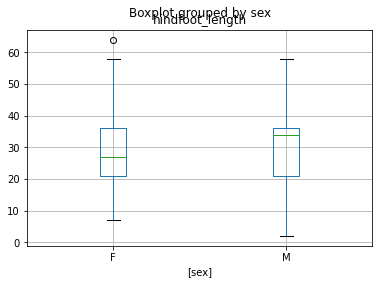

In [19]:
# boxplot
df.loc[:,['sex','hindfoot_length']].boxplot(by='sex')
print()

## Exercício 1

Plote um histograma da coluna `hindfoot_length`

## Exercício 2

Plote um gráfico de barras da coluna `sex`

# Explorando correlações

In [20]:
df.corr()

,record_id,month,day,year,plot_id,hindfoot_length,weight
record_id,1.000000,0.073746,0.017181,0.997570,-0.004048,-0.285324,-0.273123
month,0.073746,1.000000,0.011461,0.031071,0.020908,-0.013346,-0.002618
day,0.017181,0.011461,1.000000,0.018490,0.020142,-0.006067,-0.013013
year,0.997570,0.031071,0.018490,1.000000,-0.004230,-0.287259,-0.276595
plot_id,-0.004048,0.020908,0.020142,-0.004230,1.000000,-0.126284,-0.061435
hindfoot_length,-0.285324,-0.013346,-0.006067,-0.287259,-0.126284,1.000000,0.683813
weight,-0.273123,-0.002618,-0.013013,-0.276595,-0.061435,0.683813,1.000000


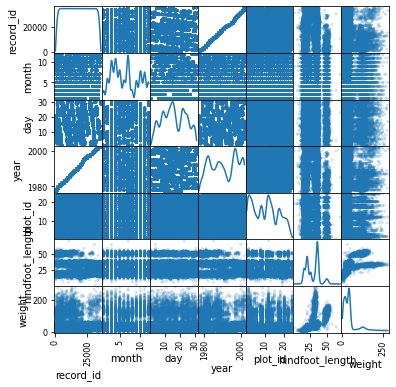

In [21]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')
print()

## Funções de agregação
### Group By

In [22]:
df.groupby(by=['species_id','sex'])['weight'] .mean()

species_id  sex
AH          M             NaN
BA          F        9.161290
            M        7.357143
DM          F       41.609685
            M       44.353134
DO          F       48.531250
            M       49.135102
DS          F      117.749548
            M      122.290984
NL          F      154.282209
            M      165.652893
OL          F       31.065817
            M       32.068410
OT          F       24.830904
            M       23.695382
OX          F       21.000000
            M       21.000000
PB          F       30.210884
            M       33.816498
PE          F       22.822183
            M       20.584906
PF          F        7.974394
            M        7.885287
PH          F       30.850000
            M       31.454545
PI          M       19.428571
PL          F       19.312500
            M       18.684211
PM          F       22.125668
            M       20.801205
PP          F       17.180670
            M       17.184486
PX          F       20.0